### Old Reference

In [2]:
install.packages("spacexr")

Warning message:
“package ‘spacexr’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [1]:
#=========================================================  Loading Libraries ==============================================================

library(Seurat) 
library(SingleCellExperiment)
library(patchwork)
library(scater)
library(plyr)
library(hdf5r)
library(ggplot2)
library(dplyr)
library(tibble)
library(data.table)
library(tidyr)
library(tidyverse)
library(spacexr)
library(Matrix)
library(janitor)
options(stringsAsFactors = FALSE)

#=========================================================  Old Reeference  =================================================================
hnc_single_cell_ref <- fread("/home/uqomulay/90days/HNC/GSE103322_HNSCC_all_data.txt")

cell_type <- as.factor(t(hnc_single_cell_ref[c(5),])[-1,])
cell_type <- revalue(cell_type, c("0"="Cancer Cell", "-Fibroblast"="Fibroblast", "myocyte"="Fibroblast"))

hnc_single_cell_ref <- hnc_single_cell_ref[6:nrow(hnc_single_cell_ref),]
hnc_single_cell_ref$V1<-gsub("'","",hnc_single_cell_ref$V1)
rownames_counts <- hnc_single_cell_ref$V1; hnc_single_cell_ref[,1] <- NULL
counts <- as.data.frame(sapply(hnc_single_cell_ref, as.integer))
rownames(counts) <- rownames_counts

reference <- spacexr::Reference(counts = counts, cell_types = cell_type)

seurat_objs <- readRDS("/afm01/UQ/Q4793/deconvolution/data.filt_sct.RDS")
A = subset(x = seurat_objs, subset = slide == "A")
B = subset(x = seurat_objs, subset = slide == "B")
C = subset(x = seurat_objs, subset = slide == "C")
D = subset(x = seurat_objs, subset = slide == "D")
rm(seurat_objs)



RCTD_counts_1 <- as.data.frame(GetAssayData(object = A, slot = "counts"))
RCTD_coordinates_1 <- GetTissueCoordinates(A)
RCTD_puck_1 <- SpatialRNA(RCTD_coordinates_1, RCTD_counts_1, colSums(RCTD_counts_1))
print(dim(RCTD_puck_1@counts)) 
hist(log(RCTD_puck_1@nUMI,2)) 
print(head(RCTD_puck_1@coords)) 
barcodes_1 <- colnames(RCTD_puck_1@counts) 
plot_puck_continuous(RCTD_puck_1, barcodes_1, RCTD_puck_1@nUMI, ylimit = c(0,round(quantile(RCTD_puck_1@nUMI,0.9))), 
                     title ='plot of nUMI') 
myRCTD_1 <- create.RCTD(RCTD_puck_1, reference, max_cores = 2)
myRCTD_1_full <- run.RCTD(myRCTD_1, doublet_mode = "full")
norm_weights_1 = sweep(myRCTD_1_full@results$weights, 1, rowSums(myRCTD_1_full@results$weights), '/')
colnames(norm_weights_1) <- paste0(colnames(norm_weights_1))

norm_weights_A <- as.data.frame(t(norm_weights_1))
colnames(norm_weights_A) <- substr(colnames(norm_weights_A),3,20)
write.csv(as.data.frame(norm_weights_A),"/home/uqomulay/90days/HNC/RCTD_A_celltype_oldref_prop.csv")


RCTD_counts_2 <- as.data.frame(GetAssayData(object = B, slot = "counts"))
RCTD_coordinates_2 <- GetTissueCoordinates(B,image="slice1_B")
RCTD_puck_2 <- SpatialRNA(RCTD_coordinates_2, RCTD_counts_2, colSums(RCTD_counts_2))
print(dim(RCTD_puck_2@counts)) 
hist(log(RCTD_puck_2@nUMI,2)) 
print(head(RCTD_puck_2@coords)) 
barcodes_2 <- colnames(RCTD_puck_2@counts) 
plot_puck_continuous(RCTD_puck_2, barcodes_2, RCTD_puck_2@nUMI, ylimit = c(0,round(quantile(RCTD_puck_2@nUMI,0.9))), 
                     title ='plot of nUMI') 
myRCTD_2 <- create.RCTD(RCTD_puck_2, reference, max_cores = 2)
myRCTD_2_full <- run.RCTD(myRCTD_2, doublet_mode = "full")
norm_weights_2 = sweep(myRCTD_2_full@results$weights, 1, rowSums(myRCTD_2_full@results$weights), '/')
colnames(norm_weights_2) <- paste0(colnames(norm_weights_2))

norm_weights_A <- as.data.frame(t(norm_weights_2))
colnames(norm_weights_A) <- substr(colnames(norm_weights_A),3,20)
write.csv(as.data.frame(norm_weights_A),"/home/uqomulay/90days/HNC/RCTD_B_celltype_oldref_prop.csv")




RCTD_counts_3 <- as.data.frame(GetAssayData(object = C, slot = "counts"))
RCTD_coordinates_3 <- GetTissueCoordinates(C,image="slice1_C")
RCTD_puck_3 <- SpatialRNA(RCTD_coordinates_3, RCTD_counts_3, colSums(RCTD_counts_3))
print(dim(RCTD_puck_3@counts)) 
hist(log(RCTD_puck_3@nUMI,2)) 
print(head(RCTD_puck_3@coords)) 
barcodes_3 <- colnames(RCTD_puck_3@counts) 
plot_puck_continuous(RCTD_puck_3, barcodes_3, RCTD_puck_3@nUMI, ylimit = c(0,round(quantile(RCTD_puck_3@nUMI,0.9))), 
                     title ='plot of nUMI') 
myRCTD_3 <- create.RCTD(RCTD_puck_3, reference, max_cores = 2)
myRCTD_3_full <- run.RCTD(myRCTD_3, doublet_mode = "full")
norm_weights_3 = sweep(myRCTD_3_full@results$weights, 1, rowSums(myRCTD_3_full@results$weights), '/')
colnames(norm_weights_3) <- paste0(colnames(norm_weights_3))

norm_weights_A <- as.data.frame(t(norm_weights_3))
colnames(norm_weights_A) <- substr(colnames(norm_weights_A),3,20)
write.csv(as.data.frame(norm_weights_A),"/home/uqomulay/90days/HNC/RCTD_C_celltype_oldref_prop.csv")




RCTD_counts_4 <- as.data.frame(GetAssayData(object = D, slot = "counts"))
RCTD_coordinates_4 <- GetTissueCoordinates(D,image="slice1_D")
RCTD_puck_4 <- SpatialRNA(RCTD_coordinates_4, RCTD_counts_4, colSums(RCTD_counts_4))
print(dim(RCTD_puck_4@counts)) 
hist(log(RCTD_puck_4@nUMI,2)) 
print(head(RCTD_puck_4@coords)) 
barcodes_4 <- colnames(RCTD_puck_4@counts) 
plot_puck_continuous(RCTD_puck_4, barcodes_4, RCTD_puck_4@nUMI, ylimit = c(0,round(quantile(RCTD_puck_4@nUMI,0.9))), 
                     title ='plot of nUMI') 
myRCTD_4 <- create.RCTD(RCTD_puck_4, reference, max_cores = 2)
myRCTD_4_full <- run.RCTD(myRCTD_4, doublet_mode = "full")
norm_weights_4 = sweep(myRCTD_4_full@results$weights, 1, rowSums(myRCTD_4_full@results$weights), '/')
colnames(norm_weights_4) <- paste0(colnames(norm_weights_4))

norm_weights_A <- as.data.frame(t(norm_weights_4))
colnames(norm_weights_A) <- substr(colnames(norm_weights_A),3,20)
write.csv(as.data.frame(norm_weights_A),"/home/uqomulay/90days/HNC/RCTD_D_celltype_oldref_prop.csv")




Loading required package: SeuratObject

Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, were retired in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, saveRDS


Loading Seurat v5 beta version 
To maintain compatibility with previous workflows, new Seurat objects will use the previous object structure by default
To use new Seurat v5 assays please run: options(Seurat.object.assay.version = 'v5')

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘pack

ERROR: Error in library(spacexr): there is no package called ‘spacexr’


### New Reference

Attaching SeuratObject

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds,

Warning message in fread("/afm01/UQ/Q4793/deconvolution/GSE181919_Barcode_metadata.txt"):
"Detected 8 column names but the data has 9 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file."


[1] "counts"


,AAACGGGCATGACGGA-1,AAAGATGAGCAGACTG-1,AAAGATGAGTGTACTC-1,AAAGATGCACTCTGTC-1,AAAGCAAAGACAGGCT-1,AAAGTAGAGAAGATTC-1,AAAGTAGTCTGCCAGG-1,AACCATGCATGTAGTC-1,AACCGCGAGTCTCCTC-1,AACGTTGCATCTGGTA-1,...,TTTGTCAAGCGTTGCC-37,TTTGTCAAGGGTATCG-37,TTTGTCACACGCGAAA-37,TTTGTCACAGGACGTA-37,TTTGTCACAGGTGGAT-37,TTTGTCACATATACCG-37,TTTGTCAGTACTCAAC-37,TTTGTCAGTCCAGTTA-37,TTTGTCAGTTAGGGTG-37,TTTGTCATCAACGAAA-37
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
RP11-34P13.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FO538757.2,1,3,0,2,0,1,2,0,0,0,...,0,0,0,0,0,0,2,0,0,0
AP006222.2,0,0,0,3,0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
RP4-669L17.10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RP11-206L10.9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
FAM87B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[1] "cell-type"


AAACGGGCATGACGGA-1 AAAGATGAGCAGACTG-1 AAAGATGAGTGTACTC-1 AAAGATGCACTCTGTC-1 
           T.cells            T.cells    Malignant.cells    Malignant.cells 
AAAGCAAAGACAGGCT-1 AAAGTAGAGAAGATTC-1 
   Malignant.cells    Malignant.cells 
10 Levels: B_Plasma.cells Dendritic.cells ... T.cells

Warning message in spacexr::Reference(counts = counts, cell_types = cell_type):
"Reference: number of cells per cell type is 17869, larger than maximum allowable of 10000. Downsampling number of cells to: 10000"


[1] 17202  3561
                             x         y
A_AAACAATCTACTAGCA-1  60.08995 213.19340
A_AAACACCAATAACTGC-1 437.72113 121.73913
A_AAACAGAGCGACTCCT-1 133.43328 410.97451
A_AAACAGCTTTCAGAAG-1 330.07496  82.57871
A_AAACAGGGTCTATATT-1 356.94152  98.17091
A_AAACAGTGTTCCTGGG-1 531.69414 214.99250


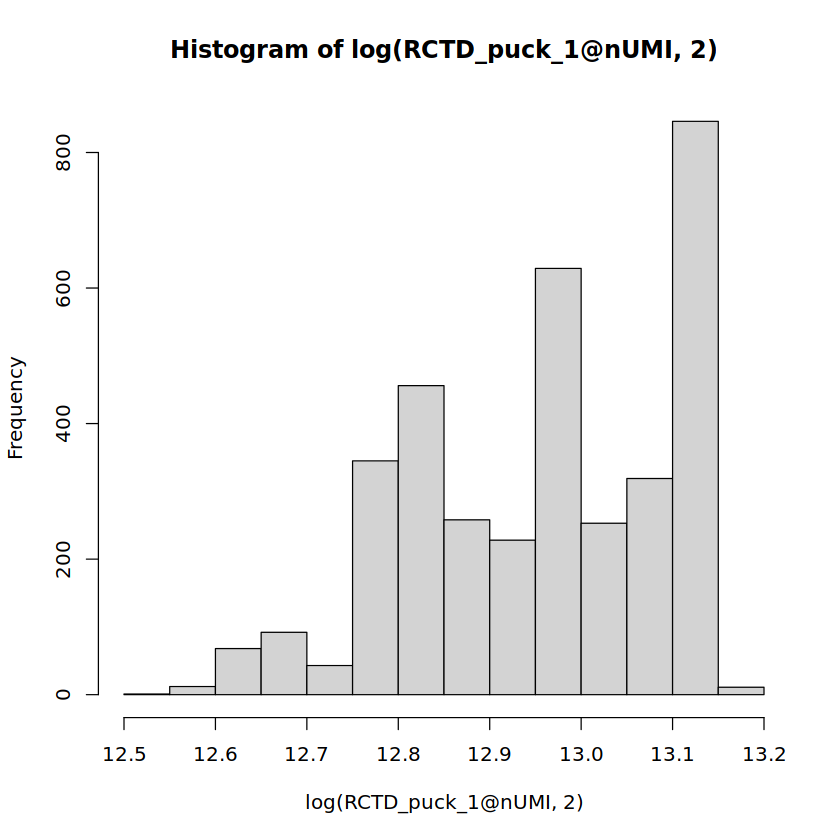

Begin: process_cell_type_info

process_cell_type_info: number of cells in reference: 44034

process_cell_type_info: number of genes in reference: 20000




   B_Plasma.cells   Dendritic.cells Endothelial.cells  Epithelial.cells 
             7437              1593              3437               993 
      Fibroblasts       Macrophages   Malignant.cells        Mast.cells 
            10000              4895              5113               270 
         Myocytes           T.cells 
              296             10000 


Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 1.1 GiB"
Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 1.5 GiB"
Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 1.5 GiB"
End: process_cell_type_info

create.RCTD: getting regression differentially expressed genes: 

get_de_genes: B_Plasma.cells found DE genes: 29

get_de_genes: Dendritic.cells found DE genes: 112

get_de_genes: Endothelial.cells found DE genes: 127

get_de_genes: Epithelial.cells found DE genes: 66

get_de_genes: Fibroblasts found DE genes: 182

get_de_genes: Macrophages found DE genes: 156

get_de_genes: Malignant.cells found DE genes: 113

get_de_genes: Mast.cells found DE genes: 113

get_de_genes: Myocytes found DE genes: 177

get_de_genes: T.cells found DE genes: 95

get_de_genes: total DE genes: 942

create.RCTD: getting platform effect normalization differentially expressed genes: 

get_de_genes:

[1] 17202  3481


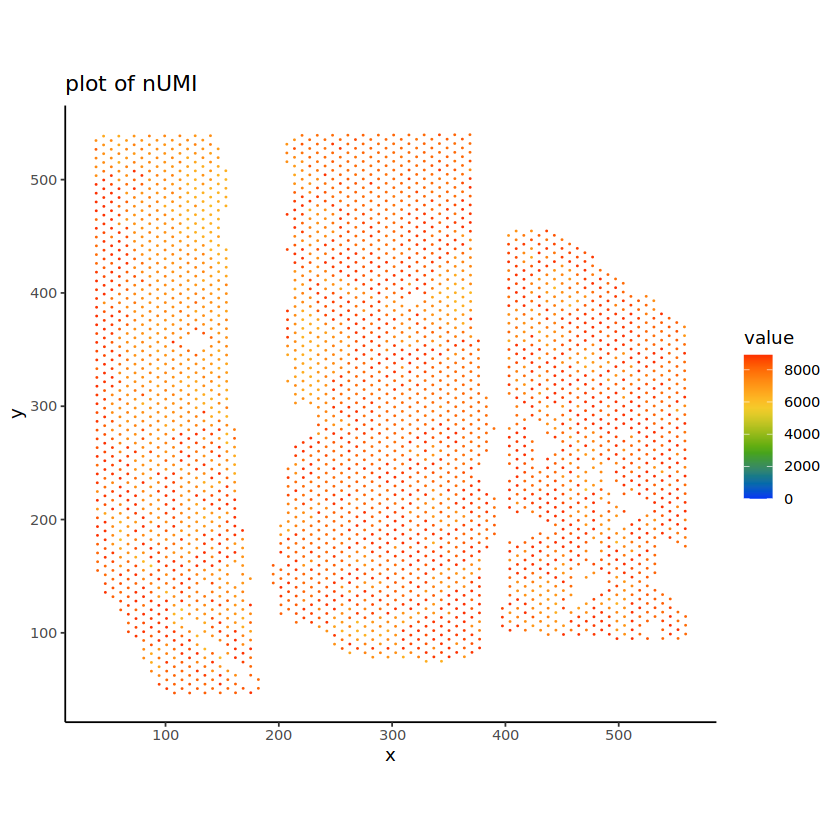

                             x         y
B_AAACAACGAATAGTTC-1  40.53408 110.66162
B_AAACAAGTATCTCCCA-1 375.08967 443.90195
B_AAACAATCTACTAGCA-1  60.26305 214.98605
B_AAACACCAATAACTGC-1 436.72777 123.75448
B_AAACAGAGCGACTCCT-1 133.43962 412.09645
B_AAACAGCTTTCAGAAG-1 329.41410  84.77481


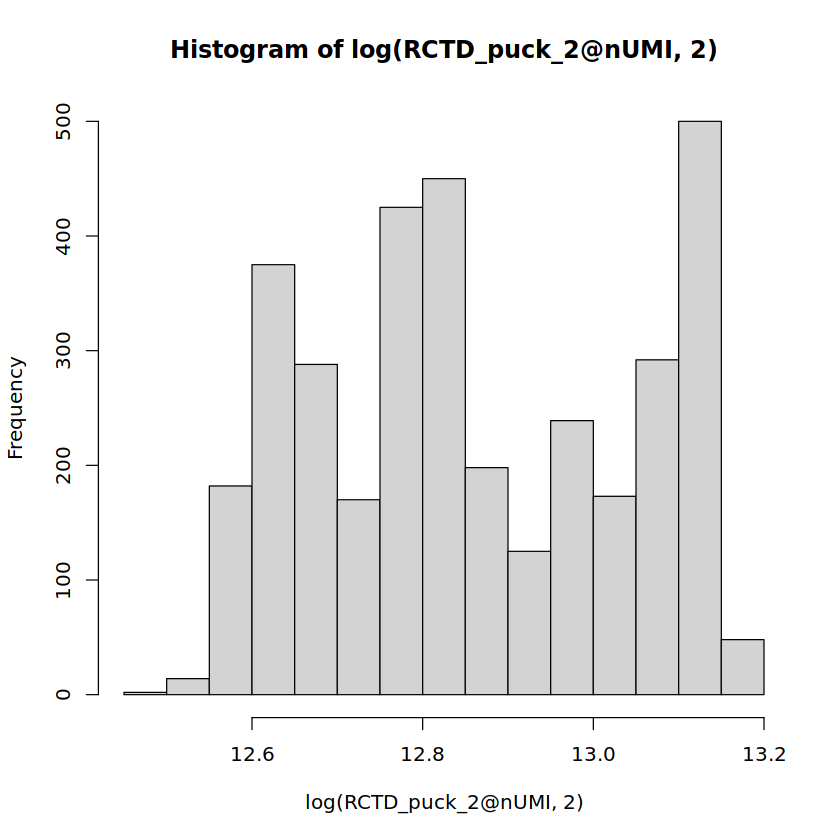

Begin: process_cell_type_info

process_cell_type_info: number of cells in reference: 44034

process_cell_type_info: number of genes in reference: 20000




   B_Plasma.cells   Dendritic.cells Endothelial.cells  Epithelial.cells 
             7437              1593              3437               993 
      Fibroblasts       Macrophages   Malignant.cells        Mast.cells 
            10000              4895              5113               270 
         Myocytes           T.cells 
              296             10000 


Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 1.1 GiB"
Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 1.5 GiB"
Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 1.5 GiB"
End: process_cell_type_info

create.RCTD: getting regression differentially expressed genes: 

get_de_genes: B_Plasma.cells found DE genes: 29

get_de_genes: Dendritic.cells found DE genes: 111

get_de_genes: Endothelial.cells found DE genes: 127

get_de_genes: Epithelial.cells found DE genes: 66

get_de_genes: Fibroblasts found DE genes: 183

get_de_genes: Macrophages found DE genes: 155

get_de_genes: Malignant.cells found DE genes: 113

get_de_genes: Mast.cells found DE genes: 112

get_de_genes: Myocytes found DE genes: 179

get_de_genes: T.cells found DE genes: 95

get_de_genes: total DE genes: 943

create.RCTD: getting platform effect normalization differentially expressed genes: 

get_de_genes:

[1] 17202  3352


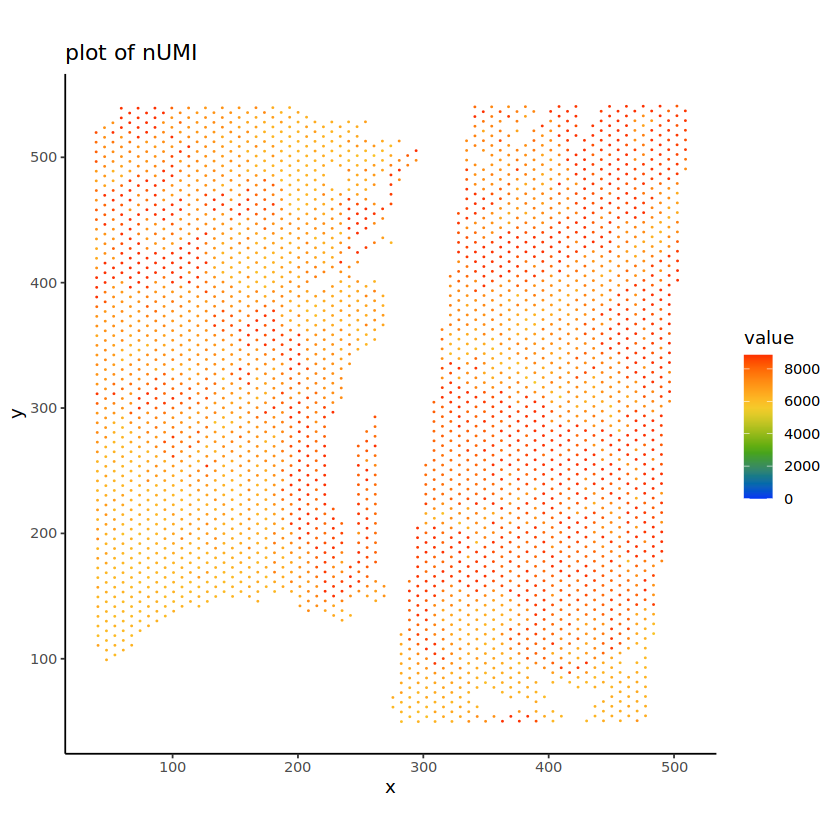

                             x         y
C_AAACAACGAATAGTTC-1  40.04389 107.32242
C_AAACAATCTACTAGCA-1  59.79649 211.77175
C_AAACACCAATAACTGC-1 436.83160 120.49082
C_AAACAGAGCGACTCCT-1 133.00080 409.17797
C_AAACAGCTTTCAGAAG-1 329.32960  81.40463
C_AAACAGGGTCTATATT-1 356.20510  96.96728


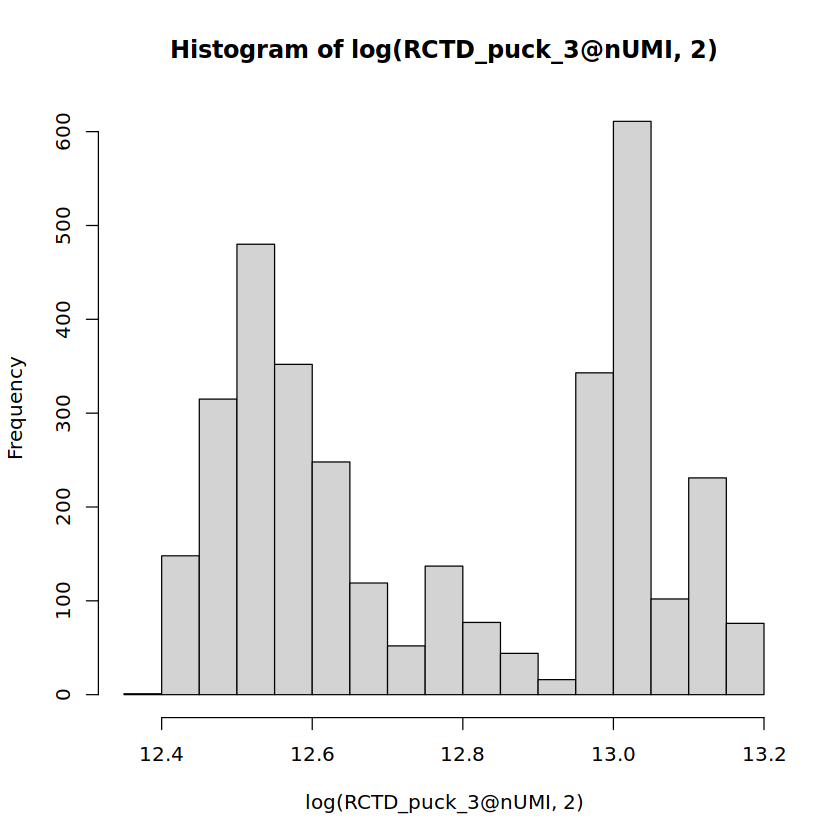

Begin: process_cell_type_info

process_cell_type_info: number of cells in reference: 44034

process_cell_type_info: number of genes in reference: 20000




   B_Plasma.cells   Dendritic.cells Endothelial.cells  Epithelial.cells 
             7437              1593              3437               993 
      Fibroblasts       Macrophages   Malignant.cells        Mast.cells 
            10000              4895              5113               270 
         Myocytes           T.cells 
              296             10000 


Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 1.1 GiB"
Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 1.5 GiB"
Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 1.5 GiB"
End: process_cell_type_info

create.RCTD: getting regression differentially expressed genes: 

get_de_genes: B_Plasma.cells found DE genes: 29

get_de_genes: Dendritic.cells found DE genes: 112

get_de_genes: Endothelial.cells found DE genes: 127

get_de_genes: Epithelial.cells found DE genes: 66

get_de_genes: Fibroblasts found DE genes: 183

get_de_genes: Macrophages found DE genes: 156

get_de_genes: Malignant.cells found DE genes: 113

get_de_genes: Mast.cells found DE genes: 113

get_de_genes: Myocytes found DE genes: 177

get_de_genes: T.cells found DE genes: 95

get_de_genes: total DE genes: 943

create.RCTD: getting platform effect normalization differentially expressed genes: 

get_de_genes:

[1] 17202  3218


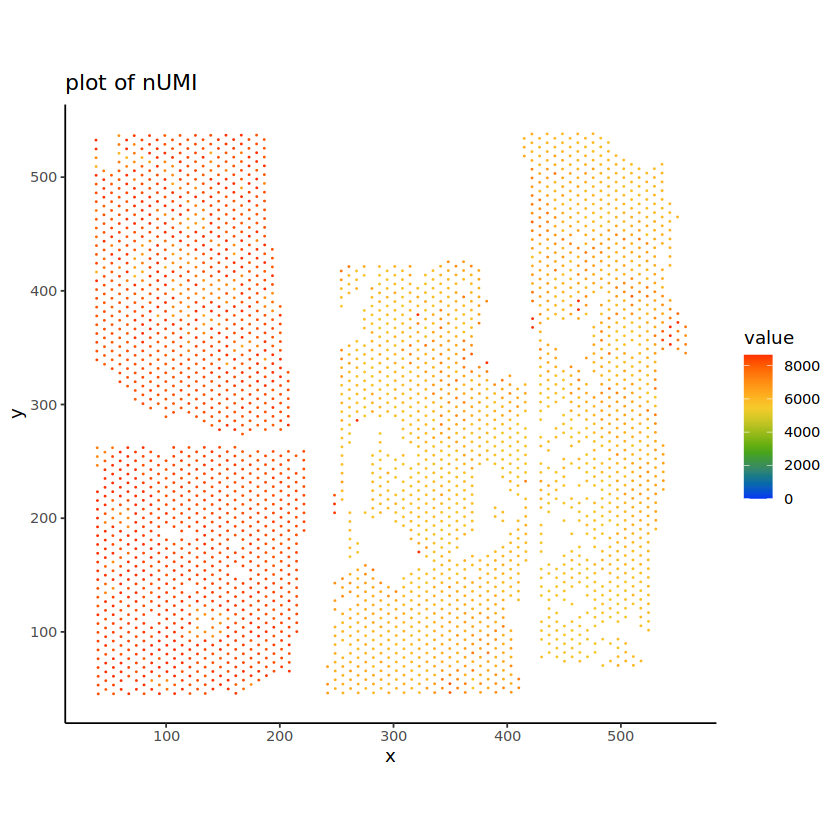

                             x        y
D_AAACAACGAATAGTTC-1  40.60600 109.3790
D_AAACAAGTATCTCCCA-1 375.20183 442.7190
D_AAACAATCTACTAGCA-1  60.34087 213.6749
D_AAACAGAGCGACTCCT-1 133.47951 410.9040
D_AAACATTTCCCGGATT-1 449.17770 423.7018
D_AAACCACTACACAGAT-1  59.26443 499.4119


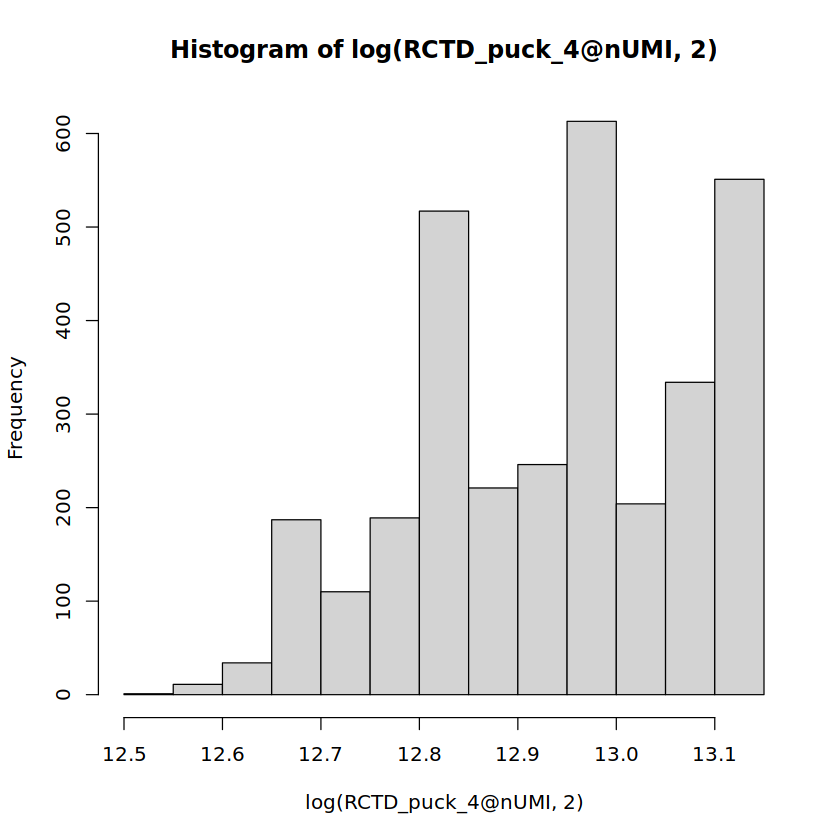

Begin: process_cell_type_info

process_cell_type_info: number of cells in reference: 44034

process_cell_type_info: number of genes in reference: 20000




   B_Plasma.cells   Dendritic.cells Endothelial.cells  Epithelial.cells 
             7437              1593              3437               993 
      Fibroblasts       Macrophages   Malignant.cells        Mast.cells 
            10000              4895              5113               270 
         Myocytes           T.cells 
              296             10000 


Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 1.1 GiB"
Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 1.5 GiB"
Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 1.5 GiB"
End: process_cell_type_info

create.RCTD: getting regression differentially expressed genes: 

get_de_genes: B_Plasma.cells found DE genes: 29

get_de_genes: Dendritic.cells found DE genes: 112

get_de_genes: Endothelial.cells found DE genes: 127

get_de_genes: Epithelial.cells found DE genes: 66

get_de_genes: Fibroblasts found DE genes: 182

get_de_genes: Macrophages found DE genes: 156

get_de_genes: Malignant.cells found DE genes: 113

get_de_genes: Mast.cells found DE genes: 113

get_de_genes: Myocytes found DE genes: 179

get_de_genes: T.cells found DE genes: 95

get_de_genes: total DE genes: 944

create.RCTD: getting platform effect normalization differentially expressed genes: 

get_de_genes:

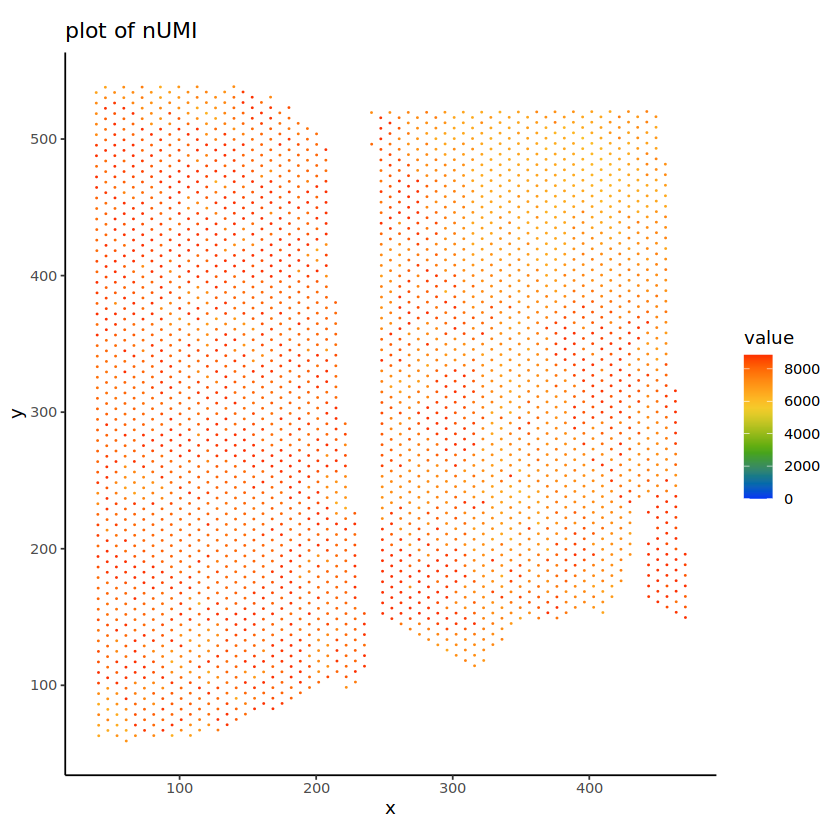

In [1]:
#=========================================================  Loading Libraries ==============================================================

library(Seurat) 
library(SingleCellExperiment)
library(patchwork)
library(scater)
library(plyr)
library(hdf5r)
library(ggplot2)
library(dplyr)
library(tibble)
library(data.table)
library(tidyr)
library(tidyverse)
library(spacexr)
library(Matrix)
library(janitor)
options(stringsAsFactors = FALSE)

#=========================================================  New Reeference  =================================================================

hnc_single_cell_ref <- fread("/afm01/UQ/Q4793/deconvolution/GSE181919_UMI_counts.txt")
rownames_counts <- hnc_single_cell_ref$V1; counts <- hnc_single_cell_ref[,-1]
colnames(counts) <- gsub("\\.","-",colnames(counts))
counts <- as.data.frame(counts)
rownames(counts) <- rownames_counts

cell_type <- fread("/afm01/UQ/Q4793/deconvolution/GSE181919_Barcode_metadata.txt")
cell_type <- t(cell_type) %>% row_to_names(row_number = 1)
cell_type <- as.factor(cell_type[nrow(cell_type),])

print("counts")
head(counts)
print("cell-type")
head(cell_type)

reference <- spacexr::Reference(counts = counts, cell_types = cell_type)


seurat_objs <- readRDS("/afm01/UQ/Q4793/deconvolution/data.filt_sct.RDS")
A = subset(x = seurat_objs, subset = slide == "A")
B = subset(x = seurat_objs, subset = slide == "B")
C = subset(x = seurat_objs, subset = slide == "C")
D = subset(x = seurat_objs, subset = slide == "D")
rm(seurat_objs)



RCTD_counts_1 <- as.data.frame(GetAssayData(object = A, slot = "counts"))
RCTD_coordinates_1 <- GetTissueCoordinates(A)
RCTD_puck_1 <- SpatialRNA(RCTD_coordinates_1, RCTD_counts_1, colSums(RCTD_counts_1))
print(dim(RCTD_puck_1@counts)) 
hist(log(RCTD_puck_1@nUMI,2)) 
print(head(RCTD_puck_1@coords)) 
barcodes_1 <- colnames(RCTD_puck_1@counts) 
plot_puck_continuous(RCTD_puck_1, barcodes_1, RCTD_puck_1@nUMI, ylimit = c(0,round(quantile(RCTD_puck_1@nUMI,0.9))), 
                     title ='plot of nUMI') 
myRCTD_1 <- create.RCTD(RCTD_puck_1, reference, max_cores = 2)
myRCTD_1_full <- run.RCTD(myRCTD_1, doublet_mode = "full")
norm_weights_1 = sweep(myRCTD_1_full@results$weights, 1, rowSums(myRCTD_1_full@results$weights), '/')
colnames(norm_weights_1) <- paste0(colnames(norm_weights_1))

norm_weights_A <- as.data.frame(t(norm_weights_1))
colnames(norm_weights_A) <- substr(colnames(norm_weights_A),3,20)
write.csv(as.data.frame(norm_weights_A),"/home/uqomulay/90days/HNC/RCTD_A_celltype_newref_prop.csv")


RCTD_counts_2 <- as.data.frame(GetAssayData(object = B, slot = "counts"))
RCTD_coordinates_2 <- GetTissueCoordinates(B,image="slice1_B")
RCTD_puck_2 <- SpatialRNA(RCTD_coordinates_2, RCTD_counts_2, colSums(RCTD_counts_2))
print(dim(RCTD_puck_2@counts)) 
hist(log(RCTD_puck_2@nUMI,2)) 
print(head(RCTD_puck_2@coords)) 
barcodes_2 <- colnames(RCTD_puck_2@counts) 
plot_puck_continuous(RCTD_puck_2, barcodes_2, RCTD_puck_2@nUMI, ylimit = c(0,round(quantile(RCTD_puck_2@nUMI,0.9))), 
                     title ='plot of nUMI') 
myRCTD_2 <- create.RCTD(RCTD_puck_2, reference, max_cores = 2)
myRCTD_2_full <- run.RCTD(myRCTD_2, doublet_mode = "full")
norm_weights_2 = sweep(myRCTD_2_full@results$weights, 1, rowSums(myRCTD_2_full@results$weights), '/')
colnames(norm_weights_2) <- paste0(colnames(norm_weights_2))

norm_weights_A <- as.data.frame(t(norm_weights_2))
colnames(norm_weights_A) <- substr(colnames(norm_weights_A),3,20)
write.csv(as.data.frame(norm_weights_A),"/home/uqomulay/90days/HNC/RCTD_B_celltype_newref_prop.csv")




RCTD_counts_3 <- as.data.frame(GetAssayData(object = C, slot = "counts"))
RCTD_coordinates_3 <- GetTissueCoordinates(C,image="slice1_C")
RCTD_puck_3 <- SpatialRNA(RCTD_coordinates_3, RCTD_counts_3, colSums(RCTD_counts_3))
print(dim(RCTD_puck_3@counts)) 
hist(log(RCTD_puck_3@nUMI,2)) 
print(head(RCTD_puck_3@coords)) 
barcodes_3 <- colnames(RCTD_puck_3@counts) 
plot_puck_continuous(RCTD_puck_3, barcodes_3, RCTD_puck_3@nUMI, ylimit = c(0,round(quantile(RCTD_puck_3@nUMI,0.9))), 
                     title ='plot of nUMI') 
myRCTD_3 <- create.RCTD(RCTD_puck_3, reference, max_cores = 2)
myRCTD_3_full <- run.RCTD(myRCTD_3, doublet_mode = "full")
norm_weights_3 = sweep(myRCTD_3_full@results$weights, 1, rowSums(myRCTD_3_full@results$weights), '/')
colnames(norm_weights_3) <- paste0(colnames(norm_weights_3))

norm_weights_A <- as.data.frame(t(norm_weights_3))
colnames(norm_weights_A) <- substr(colnames(norm_weights_A),3,20)
write.csv(as.data.frame(norm_weights_A),"/home/uqomulay/90days/HNC/RCTD_C_celltype_newref_prop.csv")




RCTD_counts_4 <- as.data.frame(GetAssayData(object = D, slot = "counts"))
RCTD_coordinates_4 <- GetTissueCoordinates(D,image="slice1_D")
RCTD_puck_4 <- SpatialRNA(RCTD_coordinates_4, RCTD_counts_4, colSums(RCTD_counts_4))
print(dim(RCTD_puck_4@counts)) 
hist(log(RCTD_puck_4@nUMI,2)) 
print(head(RCTD_puck_4@coords)) 
barcodes_4 <- colnames(RCTD_puck_4@counts) 
plot_puck_continuous(RCTD_puck_4, barcodes_4, RCTD_puck_4@nUMI, ylimit = c(0,round(quantile(RCTD_puck_4@nUMI,0.9))), 
                     title ='plot of nUMI') 
myRCTD_4 <- create.RCTD(RCTD_puck_4, reference, max_cores = 2)
myRCTD_4_full <- run.RCTD(myRCTD_4, doublet_mode = "full")
norm_weights_4 = sweep(myRCTD_4_full@results$weights, 1, rowSums(myRCTD_4_full@results$weights), '/')
colnames(norm_weights_4) <- paste0(colnames(norm_weights_4))

norm_weights_A <- as.data.frame(t(norm_weights_4))
colnames(norm_weights_A) <- substr(colnames(norm_weights_A),3,20)
write.csv(as.data.frame(norm_weights_A),"/home/uqomulay/90days/HNC/RCTD_D_celltype_newref_prop.csv")


